In [2]:
import numpy as np 
import pandas as pd 

df = pd.read_csv("Telco-Customer-Churn.csv")
pd.set_option("display.max_columns", None)
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Checking for missing value
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

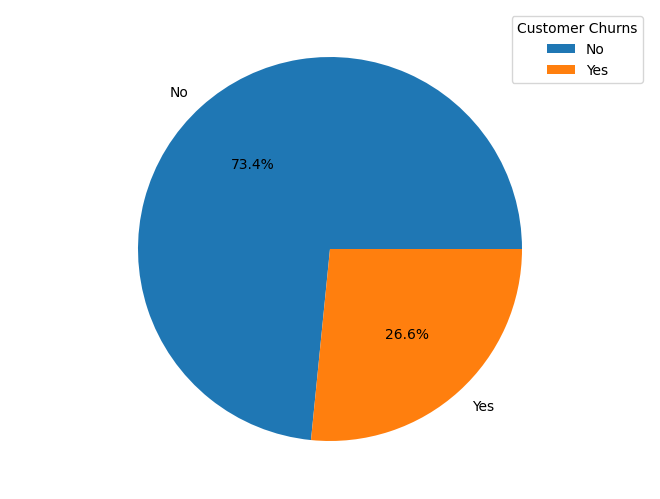

In [4]:
import matplotlib.pyplot as plt

#customers churned or not?
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
a = df.groupby('Churn').gender.count()
ax.pie(a, labels=a.keys(), autopct='%1.1f%%')
ax.legend(title = "Customer Churns") #0 for no, 1 for yes
plt.show

In [13]:
# maximum value of tenure
df['tenure'].max()

72

In [14]:
def cohort(tenure):
    if tenure <= 12:
        return 0
    elif tenure <= 24:
        return 1
    elif tenure <= 36:
        return 2
    elif tenure <= 48:
        return 3
    elif tenure <= 60:
        return 4
    elif tenure <= 72:
        return 5
    else:
        return 6
    
#  It apply a function to every data element of a column
df['tenure'] = df['tenure'].apply(cohort)
df.head(4)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,3,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No


In [15]:
X = df.drop(['Churn', 'customerID'],axis=1)

# Converting target categorical column into numerical  
df['Churn'] = df['Churn'].map( {'Yes':1 ,'No':0})

y = df['Churn']

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
X_train.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
850,Male,0,No,No,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,24.85,62.00
2122,Male,0,Yes,No,3,No,No phone service,DSL,Yes,Yes,Yes,No,No,No,One year,Yes,Electronic check,42.35,1716.45


In [17]:
from sklearn.svm import SVC 
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, GradientBoostingClassifier, StackingClassifier

combined_trf = ColumnTransformer(
    transformers= [('ss', StandardScaler(), [17, 18]), 
    ('ohe', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), 
     [0, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])],
    remainder='passthrough')

pca = PCA(n_components=15)

# Base Learners
knn = KNeighborsClassifier()
svc = SVC(probability=True)
rfc = RandomForestClassifier()

# Bagging
voting = VotingClassifier(estimators=[('knn', knn), ('svc', svc), ('rfc', rfc)],voting='soft')

# Boosting
gbc = GradientBoostingClassifier()

# Stacking
estimator = [
    ('voting', voting),
    ('gbc', gbc)
]

stack = StackingClassifier(estimator, n_jobs=-1, final_estimator= LogisticRegression(penalty='l2',solver='saga'))

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV

# creating pipeline
pipe = Pipeline([
     ('step1', combined_trf),
     ('step2', pca),
     ('step3', stack)
     ]
)

# hyperparameter tuning
param_grid = {
    "step3__voting__knn__n_neighbors": [5, 11],
    "step3__voting__svc__C": [0.1,0.4,1],
    "step3__voting__svc__kernel": ['poly', 'rbf'],
    "step3__voting__svc__degree": [2, 3],
    "step3__voting__rfc__n_estimators": [64, 128],
    "step3__voting__rfc__max_depth": [None, 8, 12],    
    "step3__voting__rfc__min_samples_split": [15, 20, 30],
    "step3__gbc__learning_rate": [0.2, 0.4, 0.6],
    "step3__gbc__max_features": [8, 12],
    "step3__gbc__n_estimators": [128, 256],
    "step3__gbc__min_samples_split": [15, 25, 30],
    "step3__gbc__max_depth": [None, 7, 10]
}

search = RandomizedSearchCV(pipe, param_grid, n_jobs=-1, n_iter=2, scoring= 'accuracy', cv=5)
search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('step1',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ss',
                                                                               StandardScaler(),
                                                                               [17,
                                                                                18]),
                                                                              ('ohe',
                                                                               OneHotEncoder(handle_unknown='ignore',
                                                                                             sparse_output=False),
                                                                               [0,
                                                                                2,
                                                                                3,
                                                                                5,
                                                                                6,
                                                                                7,
                                                                                8,
                                                                                9,
                                                                                10,
                                                                                11,
                                                                                12,
                                                                                13,
                                                                                14,
                                                                                15,
                                                                                16])])),
                                             ('step2', PCA(n_components=15)),
                                             ('step3',
                                              StackingClassifier(estimators=[('voting',
                                                                              VotingClassif...
                                        'step3__gbc__n_estimators': [128, 256],
                                        'step3__voting__knn__n_neighbors': [5,
                                                                            11],
                                        'step3__voting__rfc__max_depth': [None,
                                                                          8,
                                                                          12],
                                        'step3__voting__rfc__min_samples_split': [15,
                                                                                  20,
                                                                                  30],
                                        'step3__voting__rfc__n_estimators': [64,
                                                                             128],
                                        'step3__voting__svc__C': [0.1, 0.4, 1],
                                        'step3__voting__svc__degree': [2, 3],
                                        'step3__voting__svc__kernel': ['poly',
                                                                       'rbf']},
                   scoring='accuracy')

In [19]:
print("Parameters of Best Estimator in Model: ")
print(search.best_params_)
print("Best score in grid search:")
print(search.best_score_)

Parameters of Best Estimator in Model: 
{'step3__voting__svc__kernel': 'poly', 'step3__voting__svc__degree': 3, 'step3__voting__svc__C': 1, 'step3__voting__rfc__n_estimators': 64, 'step3__voting__rfc__min_samples_split': 30, 'step3__voting__rfc__max_depth': 8, 'step3__voting__knn__n_neighbors': 11, 'step3__gbc__n_estimators': 128, 'step3__gbc__min_samples_split': 15, 'step3__gbc__max_features': 8, 'step3__gbc__max_depth': 7, 'step3__gbc__learning_rate': 0.6}
Best score in grid search:
0.7943111111111111


In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
y_pred = search.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))

Accuracy:  0.8116560056858564
Precision:  0.6875
Recall:  0.4647887323943662
